# How likely are similarly ranked tennis players to win?

_Practice linear regression model to deepen knowledge on the topics by using a random dataset from a familiar topic_


## Importing Data

First, lets grab a sample dataset from Kaggle. Ok I found a dataset on tennis matches from 2000 to January 2024.

We can import a csv file into a dataframe from the Pandas library.

We must have our current working directory set to the same directory in which the python file and csv file are located.

In order to have no problem with the csv, we can specify whether it has headers or not. Since our does, we do not explicitly indicate as so.


In [1]:
import pandas as pd
df = pd.read_csv("atp_tennis.csv")
df

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.00,-1.00,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.00,-1.00,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.00,-1.00,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.00,-1.00,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.00,-1.00,7-6 5-7 6-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61663,ASB Classic,2024-01-10,ATP250,Outdoor,Hard,Quarterfinals,3,Muller A.,Daniel T.,Daniel T.,79,74,711,739,1.91,1.91,4-6 7-6 3-6
61664,ASB Classic,2024-01-11,ATP250,Outdoor,Hard,Quarterfinals,3,Shelton B.,Carballes Baena R.,Shelton B.,16,67,2145,796,1.17,5.00,6-4 6-3
61665,ASB Classic,2024-01-12,ATP250,Outdoor,Hard,Semifinals,3,Shelton B.,Daniel T.,Daniel T.,16,74,2145,739,1.22,4.33,5-7 6-7
61666,ASB Classic,2024-01-12,ATP250,Outdoor,Hard,Semifinals,3,Tabilo A.,Fils A.,Tabilo A.,82,35,707,1208,4.00,1.25,6-2 7-5


Now let's check the datatype of each column:


In [2]:
df.dtypes

Tournament     object
Date           object
Series         object
Court          object
Surface        object
Round          object
Best of         int64
Player_1       object
Player_2       object
Winner         object
Rank_1          int64
Rank_2          int64
Pts_1           int64
Pts_2           int64
Odd_1         float64
Odd_2         float64
Score          object
dtype: object

Since the data types have been imported correctly, nothing more is needed to be done to finish the import of the csv file.

## Problem Statement

Now, let's delimit our research by establishing a purpose for the data analysis. One can be to create a linear regression model some kind of relation between two values that are most certainly highly correlated (in order to test the precision of estimations $\hat{y}$ to target values $y$).

I know! Let's look at how much correlation there is between a person's rank and wins. For example, we can go through all the matches and look at the person with the highest rank between both and see if they won.

Now we must define our independent and dependent variables and filter our data based on them. There will be two analysis: the first to obtain the second's target.

First, the independent variable should be the difference in rank between the loser and the winner and the dependent variable should be if they won the match.

After obtaining multiple samples for that specific rank difference we can obtain an estimated winning percentage from the amount of times won compared to the total amount of matches played (with that specific rank difference).

For the second and final analysis, the independent variable will be the relative ranking between both players and the dependent variable will be the mean obtained before, which is the winning rate.

In the end, we will obtain a correlation for how the variance in the winning rate of players can be explained by their relative rank.


## Hypothesis

My hypothesis is that **if a person's rank is higher than their opponent's, then they are more likely to win the match.**


## Preparing Data

First we must delimit our entire dataset to the above statement.

Let's limit the dataset only with the columns we need, which are the ranks, the players, and the winner between both players.


In [3]:
df = df[["Player_1", "Rank_1", "Player_2", "Rank_2", "Winner"]]
df

,Player_1,Rank_1,Player_2,Rank_2,Winner
0,Dosedel S.,63,Ljubicic I.,77,Dosedel S.
1,Clement A.,56,Enqvist T.,5,Enqvist T.
2,Escude N.,40,Baccanello P.,655,Escude N.
3,Knippschild J.,87,Federer R.,65,Federer R.
4,Fromberg R.,81,Woodbridge T.,198,Fromberg R.
...,...,...,...,...,...
61663,Muller A.,79,Daniel T.,74,Daniel T.
61664,Shelton B.,16,Carballes Baena R.,67,Shelton B.
61665,Shelton B.,16,Daniel T.,74,Daniel T.
61666,Tabilo A.,82,Fils A.,35,Tabilo A.


Now, let's define the parameters used to delimit a rank range and the minimum total matches per rank difference


In [4]:
top_max = 1
top_min = 200
top_range = top_min - top_max
min_matches = 5

Applying these parameters we obtain the following dataset


In [5]:
df = df[
    (df['Rank_1'] <= top_min) & 
    (df['Rank_2'] <= top_min) & 
    (df['Rank_1'] >= top_max) &
    (df['Rank_2'] >= top_max)
]

df

,Player_1,Rank_1,Player_2,Rank_2,Winner
0,Dosedel S.,63,Ljubicic I.,77,Dosedel S.
1,Clement A.,56,Enqvist T.,5,Enqvist T.
3,Knippschild J.,87,Federer R.,65,Federer R.
4,Fromberg R.,81,Woodbridge T.,198,Fromberg R.
5,Arthurs W.,105,Gambill J.M.,58,Gambill J.M.
...,...,...,...,...,...
61663,Muller A.,79,Daniel T.,74,Daniel T.
61664,Shelton B.,16,Carballes Baena R.,67,Shelton B.
61665,Shelton B.,16,Daniel T.,74,Daniel T.
61666,Tabilo A.,82,Fils A.,35,Tabilo A.


Now let's adapt the dataset into a dictionary. Each key should be the relative rank $(\text{RR})$ between the winner and the loser and the value will be the total appearance of that rank difference.

If the player ranked higher won, then the key will be positive, otherwise, if the lesser ranked player is the winner, then the key will be negative.

$\text{Winner's RR} = \text{Loser's Rank} - \text{Winner's Rank}$


In [6]:
rr_wins = {}

for index, row in df.iterrows():
    if row['Winner'] == row['Player_1']:
        diff = row['Rank_2'] - row['Rank_1']
    else:
        diff = row['Rank_1'] - row['Rank_2']

    rr_wins[diff] = rr_wins.get(diff, 0) + 1

Graph the rank difference of the winner against its appearances. This graph should follow a normal distribution (since it is less likely that the top 1-10 players will go against the top 90-100)


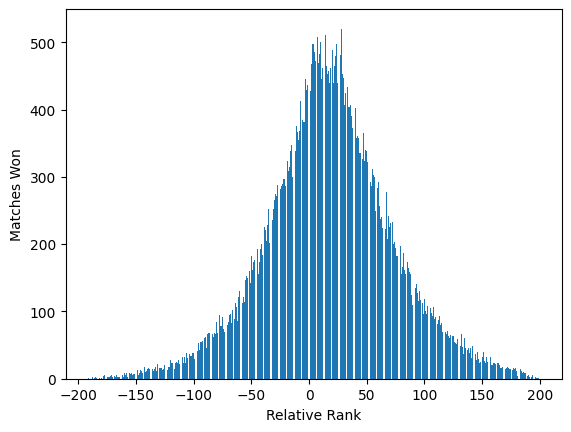

In [7]:
import matplotlib.pyplot as plt

plt.bar(rr_wins.keys(), rr_wins.values())
plt.xlabel("Relative Rank")
plt.ylabel("Matches Won")
plt.show()

## Model Data

Once that we have our data prepared for our main model we can start implementing it.

To obtain the win probability $(\text{WP})$ of a relative rank in a match with a certain rank difference $(\text{RD})$ we can simply do:

$\text{RR's WP} = \frac{\text{RR Matches Won}}{\text{RD's Total Matches}}\times 100$

To obtain the total matches $(\text{TM})$ for a certain rank difference we can sum the total amount of matches played from all lost and won matches. This means that we sum the matches won by the lower ranked person $(\text{LRP})$ with the matches won by the higher ranked person $(\text{HRP})$ to obtain the total matches with that rank difference.

$\text{RD's TM} = \text{HRP Matches Won} + \text{LRP Matches Won}$

An important note on this last calculation according to our stablished limits:

- The RD's total matches must be higher than 20
- There must be HRP won matches as well as LRP won matches to create the total matches for that RD.


Obtain each rank difference's total matches considering the limitations and display them in a scatter plot


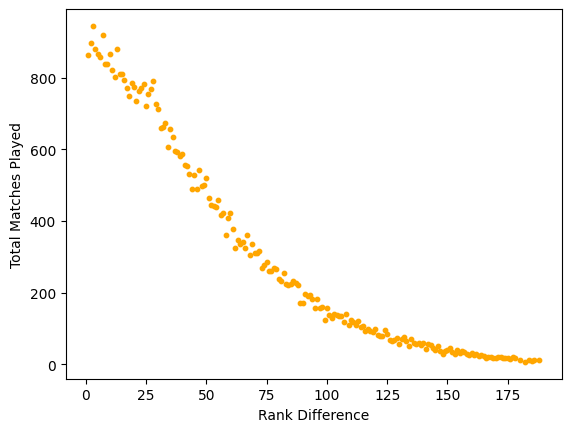

In [8]:
rd_tm = {}
for i in range(top_range+1):
    if -i in rr_wins and i in rr_wins:
        total_matches = rr_wins[i] + rr_wins[-i]
        if total_matches > min_matches:
            rd_tm[i] = total_matches

plt.scatter(rd_tm.keys(), rd_tm.values(), s=10, c="#ffa600")
plt.xlabel("Rank Difference")
plt.ylabel("Total Matches Played")
plt.show()

Obtain each relative rank's win probability and display it in a histogram.

We only take into account relative rank's from the correctly limited rank differences.


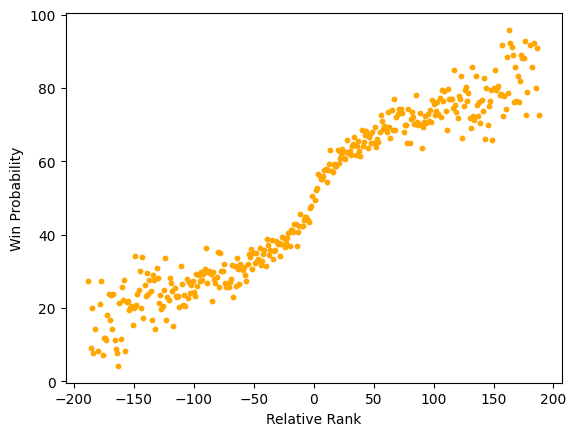

In [9]:
rr_wp = {}
for k in rr_wins.keys():
    if abs(k) in rd_tm:
        rr_wp[k] = rr_wins[k] / rd_tm[abs(k)] * 100

def rr_wp_plot(x, y):
    plt.scatter(rr_wp.keys(), rr_wp.values(), s=10, c="#ffa600")
    plt.xlabel("Relative Rank")
    plt.ylabel("Win Probability")

rr_wp_plot(rr_wp.keys(), rr_wp.values())
plt.show()

Now that we have our training set, let's implement linear regression and gradient descent.


## Model Linear Regression

In order to model our linear regression first we convert the dataset into numpy arrays so that we have better runtimes and memory usage. Now we must consider the basic functions and methods to perform the regression, which includes:

- Linear function:

$$
f_{w,b}(x) = wx + b
$$

- Total cost function:

$$
J(w,b) = \frac{1}{2m}\sum_{i=0}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^2
$$

- Gradient function:

$$
\frac{dJ(w,b)}{dw} = \frac{1}{m}\sum_{i=0}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}
$$

$$
\frac{dJ(w,b)}{db} = \frac{1}{m}\sum_{i=0}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})
$$

- Gradient descent function:

$$
w^{(j+1)} = w^{(j)} - \alpha\frac{dJ(w^{(j)},b^{(j)})}{dw}
$$

$$
b^{(j+1)} = b^{(j)} - \alpha\frac{dJ(w^{(j)},b^{(j)})}{db}
$$


Define the arrays and linear function


In [10]:
import numpy as np

x = np.sort(np.array(list(rr_wp.keys())))
y = np.sort(np.array(list(rr_wp.values())))

Define the total cost function


In [11]:
def compute_cost(x, y, w, b):
    if len(x) != len(y):
        raise Exception("x and y not of the same size")
    
    total_cost = 0
    m = len(x)

    f_wb = w*x+b
    costs = (f_wb - y) ** 2
    total_cost = np.sum(costs)
    total_cost *= (1/(2*m))

    return total_cost

Define the gradient function


In [12]:
def compute_gradient(x, y, w, b):
    dJ_dw = 0
    dJ_db = 0
    m = len(x)

    f_wb = w*x+b
    dJ_dw_array = (f_wb - y) * x
    dJ_db_array = (f_wb - y)

    dJ_dw = np.sum(dJ_dw_array) / m
    dJ_db = np.sum(dJ_db_array) / m

    return dJ_dw, dJ_db

Define the gradient descent function (with cost history through iterations)


In [13]:
def gradient_descent(x, y, w_ini, b_ini, alpha, epsilon, max_iters):
    if len(x) != len(y):
        raise Exception("x and y not of the same size")
    
    w = w_ini
    b = b_ini
    frequencies = [100, 1000, 10000, 100000]
    m = len(frequencies)
    n = 200
    J_hist = np.zeros((m,n))
    iters = np.zeros((m,n))
    ptr = {str(freq): 0 for freq in frequencies}

    for i in range(1, max_iters):
        dJ_dw, dJ_db = compute_gradient(x, y, w, b)
        
        if (np.abs(dJ_dw) < epsilon and np.abs(dJ_db) < epsilon):
            print(f"Reached w and b in {i} iterations.")
            return w, b, J_hist, iters

        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db

        for idx, freq in enumerate(frequencies):
            if ptr[str(freq)] < n and i % freq == 0:
                J_hist[idx, ptr[str(freq)]] = compute_cost(x, y, w, b)
                iters[idx, ptr[str(freq)]] = i // freq
                ptr[str(freq)] += 1

    print(f"Reached max iterations")
    return w, b, J_hist, iters

Define the cost vs iterations plotting function to visualize how effective is our gradient descent depending on different learning rates


In [14]:
def plot_cost_iters(iters, J_hist):
    fig, axs = plt.subplots(2, 2, figsize=(14,10))
    fig.suptitle("Cost vs Iterations (100, 1k, 10k, 100k)")

    for i in range(2):
        for j in range(2):
            axs[i, j].plot(np.trim_zeros(iters[2*i+j]), np.trim_zeros(J_hist[2*i+j]))
            axs[i, j].set_ylabel("Cost")
            axs[i, j].set_xlabel("Iterations")
    axs[0, 0].set_title("100")
    axs[0, 1].set_title("1k")
    axs[1, 0].set_title("10k")
    axs[1, 1].set_title("100k")
    plt.show()

## Compute Linear Regression

Once that each function has been defined, we have to compute the linear regression model, performing gradient descent to minimize the total cost using starting values for w and b of 0 each by convention.

First, lets define the hyperparameters for the gradient descent


In [15]:
w_ini = 0
b_ini = 0
alpha = 1.5e-4
epsilon = 1e-4
max_iters = 1000000

Calling the gradient descent function


In [16]:
w_all, b_all, J_hist, iters = gradient_descent(x, y, w_ini, b_ini, alpha, epsilon, max_iters)
print(f"w: {w_all}, b: {b_all}")

Reached w and b in 87477 iterations.
w: 0.21832696737228052, b: 49.99990000208232


Observe gradient descent through different iteration ranges to optimize the learning rate value


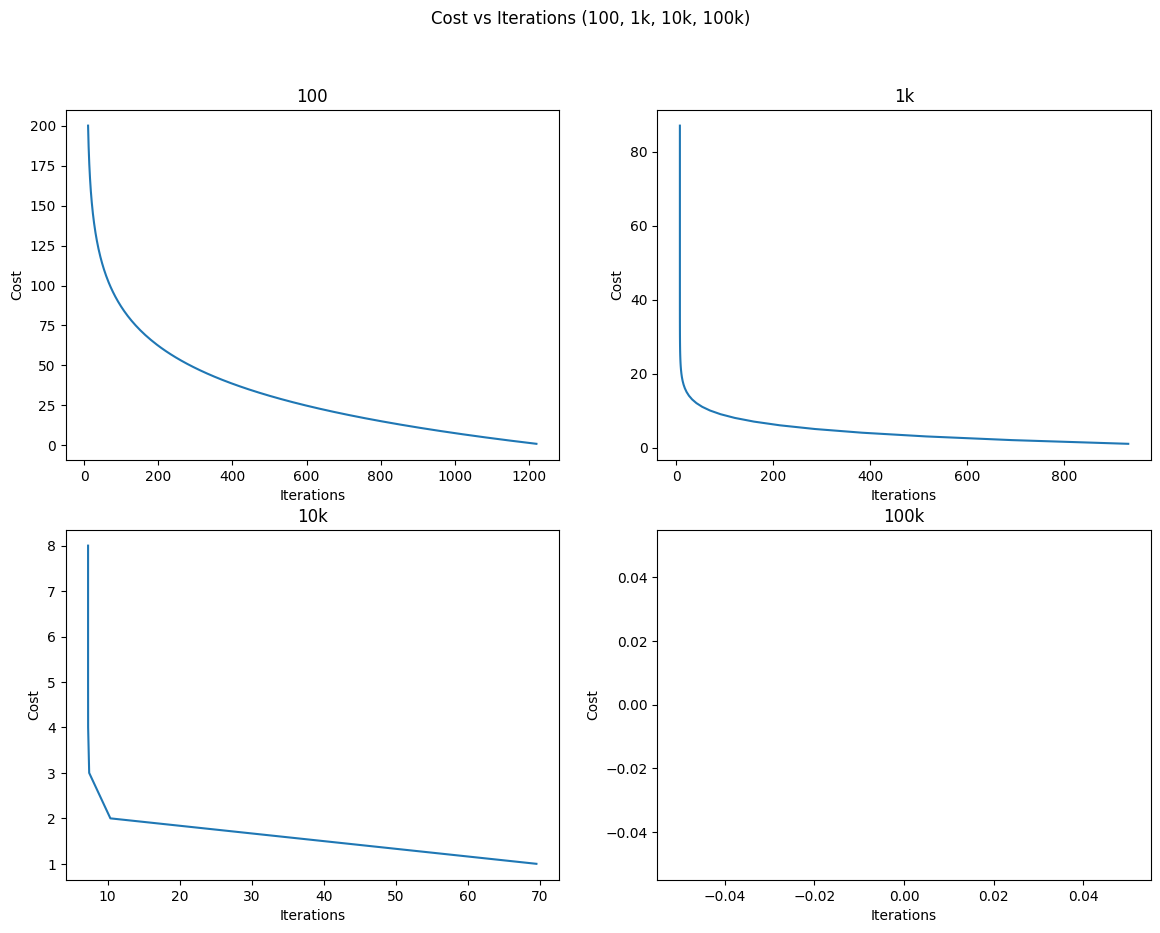

In [17]:
plot_cost_iters(J_hist, iters)

Now, we can output the linear regression on top of the graph to visualize the correlation between both variables and also compute the total (minimized) cost


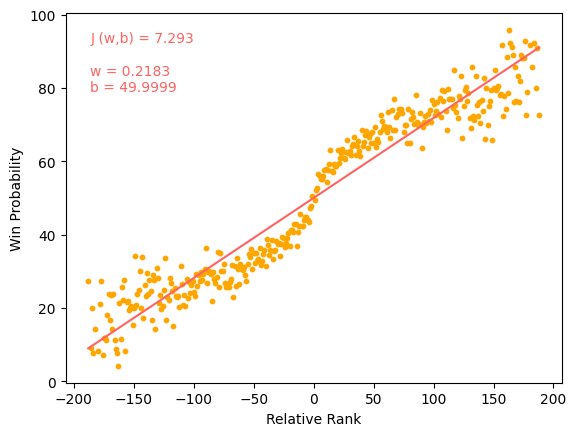

In [18]:
def lr_plot(start, stop, w, b, color):
    lr_x = np.array([start, stop])
    y_hat = np.array([w*x+b for x in lr_x])
    plt.plot(lr_x, y_hat, c=color)

m = len(x)
rr_wp_plot(x, y)
lr_plot(x[0], x[m-1], w_all, b_all, '#ff6361')
total_cost = compute_cost(x, y, w_all, b_all)
plt.text(0.05, 0.95, f"J (w,b) = {total_cost:.{3}f}\n\nw = {w_all:.{4}f}\nb = {b_all:.{4}f}", ha='left', va='top', color='#ff6361', transform=plt.gca().transAxes)
plt.show()

We can also perform the regression only before and after a relative rank of 0 to obtain two more precise linear regressions instead of one that tries to take into account all of the training set.

This means that for the first half $(\text{fh})$ we will use $x$ values up to 0, and for the second half $(\text{sh})$ one starting at values greater than 0.


In [19]:
i_fh = np.where(x < 0)
x_fh = x[i_fh]
y_fh = y[i_fh]
w_fh, b_fh, J_hist, iters = gradient_descent(x_fh, y_fh, w_ini, b_ini, alpha, epsilon, max_iters)
print(f"First half\nw: {w_fh}, b: {b_fh}")

Reached w and b in 310794 iterations.
First half
w: 0.1657296394248931, b: 43.51846919935535


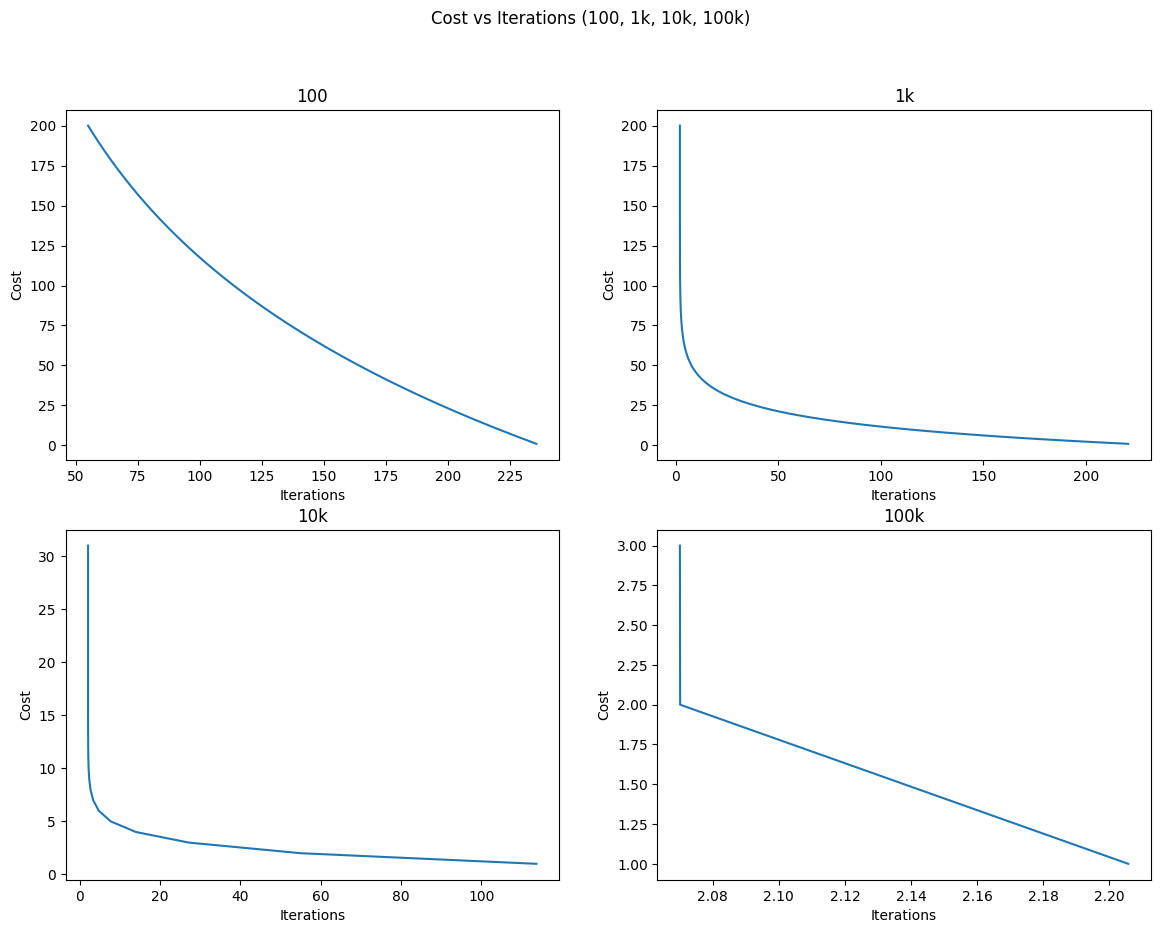

In [20]:
plot_cost_iters(J_hist, iters)

In [21]:
i_sh = np.where(x > 0)
x_sh = x[i_sh]
y_sh = y[i_sh]
w_sh, b_sh, J_hist, iters = gradient_descent(x_sh, y_sh, w_ini, b_ini, alpha, epsilon, max_iters)
print(f"Second half\nw: {w_sh}, b: {b_sh}")

Reached w and b in 317783 iterations.
Second half
w: 0.1657361668677623, b: 56.48072644609465


Display both linear regressions and their costs


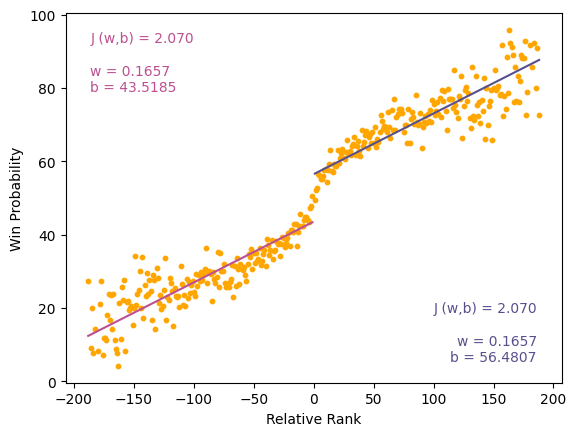

In [22]:
rr_wp_plot(x_fh, y_fh)

m = len(x_fh)
lr_plot(x_fh[0], x_fh[len(x_fh)-1], w_fh, b_fh, '#bc5090')
total_cost = compute_cost(x_fh, y_fh, w_fh, b_fh)
plt.text(0.05, 0.95, f"J (w,b) = {total_cost:.{3}f}\n\nw = {w_fh:.{4}f}\nb = {b_fh:.{4}f}", ha='left', va='top', color='#bc5090', transform=plt.gca().transAxes)

m = len(x_sh)
lr_plot(x_sh[0], x_sh[m-1], w_sh, b_sh, '#58508d')
total_cost = compute_cost(x_sh, y_sh, w_sh, b_sh)
plt.text(0.95, 0.05, f"J (w,b) = {total_cost:.{3}f}\n\nw = {w_sh:.{4}f}\nb = {b_sh:.{4}f}", ha='right', va='bottom', color='#58508d', transform=plt.gca().transAxes)

plt.show()

## Data Analysis

As we can see in the above graphs, there are multiple phenomenons happening at the same time that mainly depend on how we change different parameters


### Rank Difference's Minimum Total Matches

This parameter will stablish the total amount of training examples in the model. By having a higher minimum we will calculate sample means that are closer to their real population value. This is because as we increase the sample we will obtain more statistically relevant means that have a lower standard deviation and fewer outliers. Furthermore, by establishing a higher minimum we can also limit the amount of training examples on the regression model to only more precise ones, which should compact more the data to make it fit better (also reducing the total cost).

For example, comparing the output for a top range of 1-100 with two different rank difference's minimum total matches of 2 and 200:

**Minimum total matches of 2**

<img title="" src="./assets/rr_wp_1_2.png" alt="" width="400" data-align="inline"> <img title="" src="./assets/rr_wp_2_2.png" alt="" data-align="inline" width="400">

**Minimum total matches of 200**

<img title="" src="./assets/rr_wp_1_200.png" alt="" width="400" data-align="inline"> <img title="" src="./assets/rr_wp_2_200.png" alt="" data-align="inline" width="400">


### Rank range

The most important parameter that defines different training sets (and not just delimits them like the minimum total matches) is the rank range. This range will specify whether we get, for example, matches with a rank difference from the top 1-50, or matches with the same rank difference but from the top 100-150. This is crucial as we will be able to see truly if top ranked players (top 25) have the same odds of defeating their similarly ranked opponents (top 1-50) as lower ranked players (top 125) to beat their own similarly ranked opponents (top 100-150). By doing so, we will uncover the precision of ATP ranking when applied into lower ranks compared to higher ranks, and thus, we will truly see how likely a person is to win when they are ranked 125 compared to when they are ranked 25.

Because we have a limited dataset that has way more entries for higher ranked people, for the top 50 regression we will have a minimum total matches of 5 in order to assess with the same amount of total matches as in the top 150 regression.

**Rank range of 1 to 50 with min 5 RDTM**

<img title="" src="./assets/rr_wp_1_top50.png" alt="" width="400" data-align="inline"> <img title="" src="./assets/rr_wp_2_top50.png" alt="" data-align="inline" width="400">

**Rank range from 100 to 150 with min 5 RDTM**

<img title="" src="./assets/rr_wp_1_top150.png" alt="" width="400" data-align="inline"> <img title="" src="./assets/rr_wp_2_top150.png" alt="" data-align="inline" width="400">


## Conclusion

While the ATP ranking is broadly correct, it is obvious that it is harder to rank people in the top 100 - 200 than people on the top 1 - 50. This is probably due to the skill of each person and how it can be quantified. Moreover, top ranked players have attributes that truly set them apart from their fellow lower ranked opponents, which means there is an increasing skill gap as you come close to the top tennis rank.

On the other hand, while doing this analysis I was able to recognize some properties that could have misled the results. One of these issues was that the dataset I was working on had limited entries for lower ranked people, and thus, by having a smaller sample from which to obtain a mean (win probability), I ended up with data that presented huge variance from the real target value. This deviation caused the regression to be less precise for lower ranked people.

Finally, an additional measure that can be taken to make the analysis throw back more insights about the players, their ranks and their odds to win is to make more interactive graphics so that the model's parameters can be easily changed through sliders and also comparing the dataset's W/L odds against the final sample means we got for each rank difference, in order to assess how accurate our model was.
